# EDA and Preprocessing

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt , seaborn as sns
df = pd.read_csv('ML_final_eval.csv')
data = df.copy()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,no.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [33]:
df.shape

(41188, 21)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [37]:
df['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

## Data Cleaning & Preprocessing

In [4]:
# missing values
df.isnull().sum().sum()

0

In [5]:
# Duplicate values
df.duplicated().sum()

12

In [6]:
df.drop_duplicates(inplace=True)

In [10]:
# Object columns value counts
for i in data.columns:
    if data[i].dtype == object:
        print(i)
        print(data[i].value_counts())

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
marital
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64
education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64
default
no         32577
unknown     8596
yes            3
Name: default, dtype: int64
housing
yes        21571
no         18615
unknown      990
Name: housing, dtype: int64
loan
no         33938
yes         6248
unknown      990
Name: loan, dtype: int64
contact
cellular     26135
telephone    15041
Name: contact, 

In [11]:
# Treating 'unknown' value for the binary columns
data['default'] = data['default'].replace('unknown','no')
data['housing'] = data['housing'].replace('unknown', data['housing'].mode()[0])
data['loan'] = data['loan'].replace('unknown', data['loan'].mode()[0])

In [12]:
# Standardize binary columns - yes/no columns
bin_cols = ['default','housing','loan','y']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in bin_cols:
    data[i] = le.fit_transform(data[i])
data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,no.employed,y
0,56.0,housemaid,married,basic.4y,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,services,married,high.school,0,1,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [13]:
data.describe()

,age,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,no.employed,y
count,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,39.939236,0.000073,0.547916,0.151739,2.567879,962.464810,0.173013,0.081922,93.575720,-40.503405,3.621293,5167.034870,0.112663
std,10.128801,0.008535,0.497705,0.358772,2.770318,186.937102,0.494964,1.570883,0.578839,4.626271,1.734437,72.251364,0.316184
min,17.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,0.000000,1.000000,0.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,0.000000,1.000000,0.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,69.500000,1.000000,1.000000,1.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.950000,5.045000,5228.100000,1.000000


age: 468 outliers


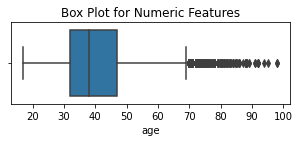

duration: 2963 outliers


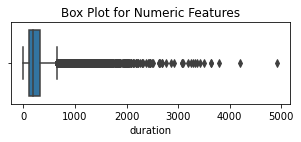

campaign: 2406 outliers


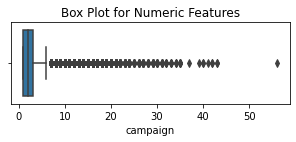

pdays: 1515 outliers


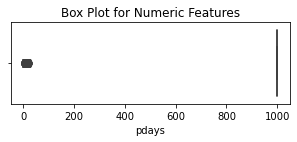

previous: 5625 outliers


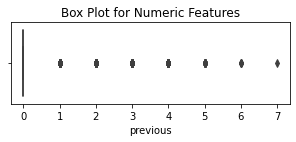

emp.var.rate: 0 outliers


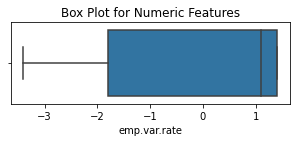

cons.price.idx: 0 outliers


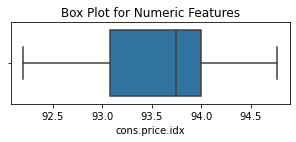

cons.conf.idx: 446 outliers


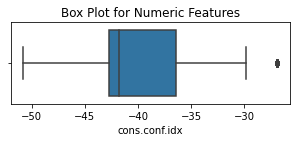

euribor3m: 0 outliers


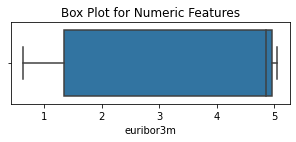

no.employed: 0 outliers


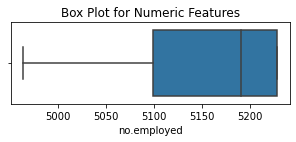

In [7]:
num_cols = ['age','duration','campaign','pdays','previous','emp.var.rate',
            'cons.price.idx','cons.conf.idx','euribor3m','no.employed']

def iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: {outliers} outliers")

# Outliers Treatment
for i in num_cols:
    if df[i].dtype != 'object':
        iqr(df,i)
        plt.figure(figsize=(5, 1.5))
        sns.boxplot(x=df[i])
        plt.title('Box Plot for Numeric Features')
        plt.show()

In [9]:
def cap_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)
    
# drop duration column due to data leakage
data.drop(columns=['duration'], inplace=True) '
    
# Cap columns 'age' and 'cons.conf.idx
for col in ['age', 'cons.conf.idx']:
    cap_iqr(data, col)

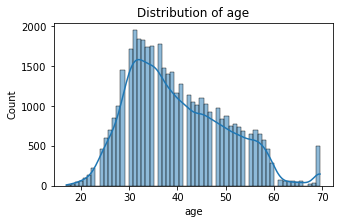

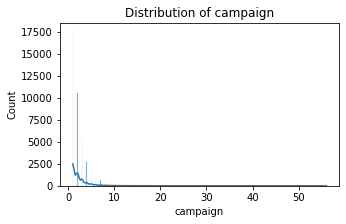

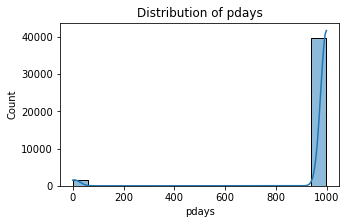

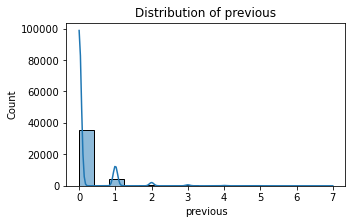

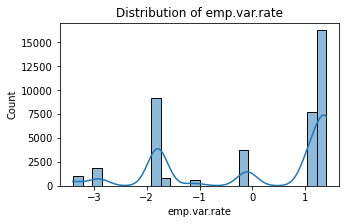

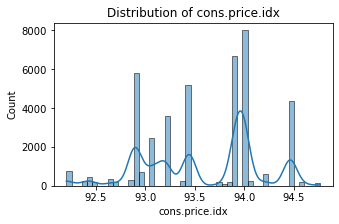

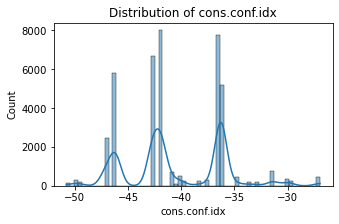

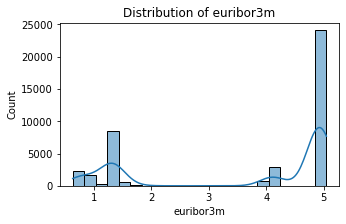

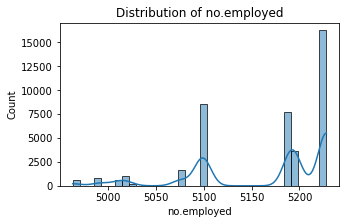

In [15]:
# Distribution of numerical columns
num_cols = ['age','campaign','pdays','previous','emp.var.rate',
            'cons.price.idx','cons.conf.idx','euribor3m','no.employed']

for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(data[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

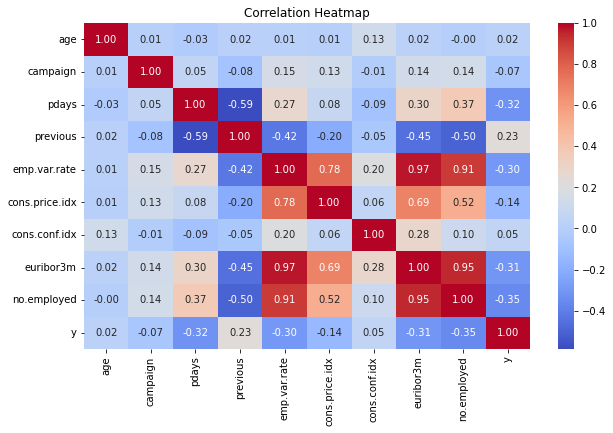

In [16]:
# Correlation Analysis
num_cols = ['age','campaign','pdays','previous','emp.var.rate',
            'cons.price.idx','cons.conf.idx','euribor3m','no.employed']

corr_data = data[num_cols + ['y']]

plt.figure(figsize=(10,6))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## Feature Engineering

In [17]:
data['previous'].value_counts()

0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [18]:
# New features
data['contacted_before'] = (data['previous'] > 0).astype(int)
data['campaign_intensity'] = data['campaign'] / data['previous'].replace(0, 1)

In [19]:
# Encode month
month_map = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,
             'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}

data['month_num'] = data['month'].map(month_map)
data['month_sin'] = np.sin(2 * np.pi * data['month_num'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month_num'] / 12)
data.drop(columns=['month','month_num'], inplace=True)

In [20]:
# Encode day_of_week
day_map = {'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7}

data['dow_num'] = data['day_of_week'].map(day_map)
data['dow_sin'] = np.sin(2 * np.pi * data['dow_num'] / 7)
data['dow_cos'] = np.cos(2 * np.pi * data['dow_num'] / 7)
data.drop(columns=['day_of_week','dow_num'], inplace=True)

In [22]:
# New Interaction feature 
data['job_education'] = data['job'] + '_' + data['education']
data['job_education'].value_counts()

admin._university.degree          5750
blue-collar_basic.9y              3623
admin._high.school                3329
technician_professional.course    3317
services_high.school              2680
                                  ... 
self-employed_illiterate             3
retired_illiterate                   3
entrepreneur_illiterate              2
admin._illiterate                    1
housemaid_illiterate                 1
Name: job_education, Length: 90, dtype: int64

In [23]:
data['job_education'] = data['job_education'].where(
    data['job_education'].map(data['job_education'].value_counts()) > 800,
    'Other')
data['job_education'].value_counts()

Other                             13112
admin._university.degree           5750
blue-collar_basic.9y               3623
admin._high.school                 3329
technician_professional.course     3317
services_high.school               2680
blue-collar_basic.4y               2318
management_university.degree       2063
technician_university.degree       1809
blue-collar_basic.6y               1425
blue-collar_high.school             878
technician_high.school              872
Name: job_education, dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 41176 non-null  float64
 1   job                 41176 non-null  object 
 2   marital             41176 non-null  object 
 3   education           41176 non-null  object 
 4   default             41176 non-null  int32  
 5   housing             41176 non-null  int32  
 6   loan                41176 non-null  int32  
 7   contact             41176 non-null  object 
 8   campaign            41176 non-null  int64  
 9   poutcome            41176 non-null  object 
 10  emp.var.rate        41176 non-null  float64
 11  cons.price.idx      41176 non-null  float64
 12  cons.conf.idx       41176 non-null  float64
 13  euribor3m           41176 non-null  float64
 14  y                   41176 non-null  int32  
 15  contacted_before    41176 non-null  int32  
 16  camp

In [25]:
cat_cols = ['job','job_education','education','marital','contact','poutcome']
data[cat_cols].nunique()

job              12
job_education    12
education         8
marital           4
contact           2
poutcome          3
dtype: int64

In [26]:
# Encoding Categorical variables
data_en = pd.get_dummies(data, columns=cat_cols, drop_first=True)
data_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   age                                           41176 non-null  float64
 1   default                                       41176 non-null  int32  
 2   housing                                       41176 non-null  int32  
 3   loan                                          41176 non-null  int32  
 4   campaign                                      41176 non-null  int64  
 5   emp.var.rate                                  41176 non-null  float64
 6   cons.price.idx                                41176 non-null  float64
 7   cons.conf.idx                                 41176 non-null  float64
 8   euribor3m                                     41176 non-null  float64
 9   y                                             41176 non-null 

In [27]:
# Scaling Numerical Features
scale_cols = ['age','campaign','emp.var.rate','cons.price.idx',
            'cons.conf.idx','euribor3m','campaign_intensity']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_en[scale_cols] = scaler.fit_transform(data_en[scale_cols])
data_en.head()

,age,default,housing,loan,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,...,education_illiterate,education_professional.course,education_university.degree,education_unknown,marital_married,marital_single,marital_unknown,contact_telephone,poutcome_nonexistent,poutcome_success
0,1.585672,0,0,0,-0.565963,0.648101,0.722628,0.88699,0.712463,0,...,0,0,0,0,1,0,0,1,1,0
1,1.684402,0,0,0,-0.565963,0.648101,0.722628,0.88699,0.712463,0,...,0,0,0,0,1,0,0,1,1,0
2,-0.290190,0,1,0,-0.565963,0.648101,0.722628,0.88699,0.712463,0,...,0,0,0,0,1,0,0,1,1,0
3,0.005999,0,0,0,-0.565963,0.648101,0.722628,0.88699,0.712463,0,...,0,0,0,0,1,0,0,1,1,0
4,1.585672,0,0,1,-0.565963,0.648101,0.722628,0.88699,0.712463,0,...,0,0,0,0,1,0,0,1,1,0


## Exploratory Data Analysis(EDA)

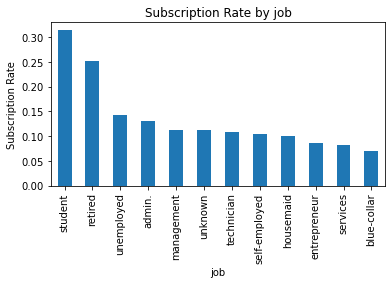

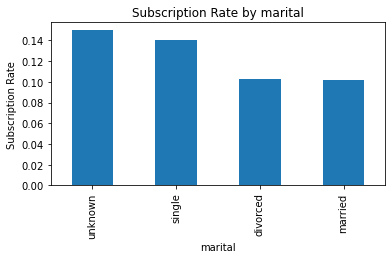

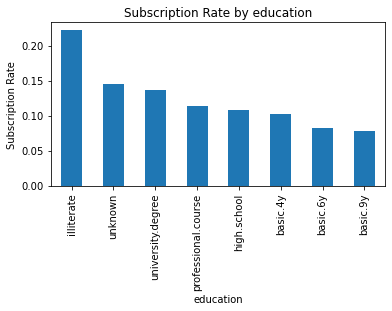

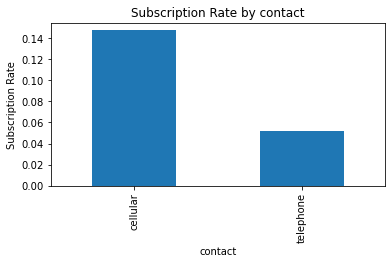

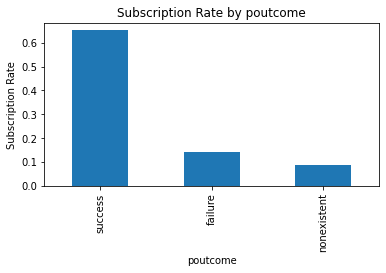

In [30]:
# Subscription rate across Categorical columns
for col in cat_cols:
    rate = data.groupby(col)['y'].mean().sort_values(ascending=False)
    plt.figure(figsize=(6,3))
    rate.plot(kind='bar')
    plt.title(f'Subscription Rate by {col}')
    plt.ylabel('Subscription Rate')
    plt.show()

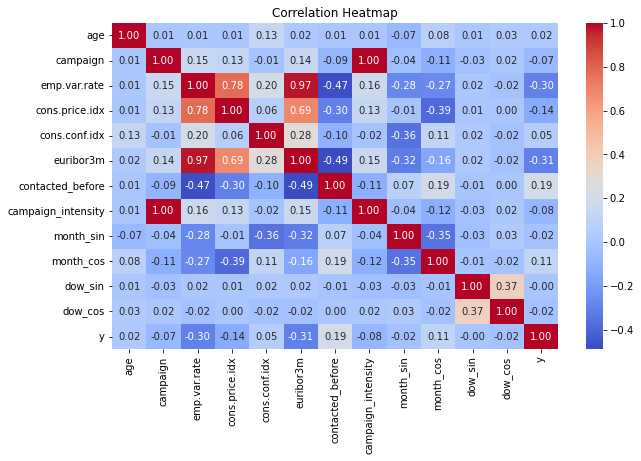

In [29]:
num_cols = ['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m',
            'contacted_before','campaign_intensity','month_sin','month_cos','dow_sin','dow_cos']

corr_data = data_en[num_cols + ['y']]

plt.figure(figsize=(10,6))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

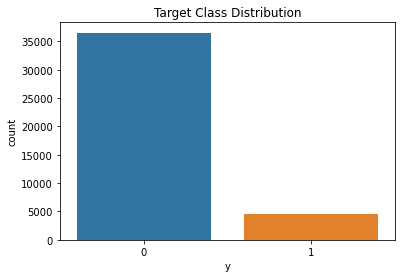

In [28]:
sns.countplot(x='y', data=data)
plt.title('Target Class Distribution')
plt.show()